In [2]:
# Import necessary libraries
import pandas as pd

# Load the Core PCOS Dataset
core_pcos_df = pd.read_csv("Core_PCOS_Dataset_Cleaned.csv")

# Display a sample of the raw dataset before preprocessing
print("Raw Core PCOS Dataset Sample:")
print(core_pcos_df.head())


Raw Core PCOS Dataset Sample:
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0        28.0         44.6        152.0   
1       2                 2           0        36.0         65.0        161.5   
2       3                 3           1        33.0         68.8        165.0   
3       4                 4           0        37.0         65.0        148.0   
4       5                 5           0        25.0         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  Pimples(Y/N)  \
0  19.3         15.0              78.0              22.0  ...           0.0   
1  24.9         15.0              74.0              20.0  ...           0.0   
2  25.3         11.0              72.0              18.0  ...           1.0   
3  29.7         13.0              72.0              20.0  ...           0.0   
4  20.1         11.0              72.0              18.0  ...           0.0   

   Fast 

In [9]:
# Step 2: Cleaning and Preprocessing the Data (re-run with full display)


# Clean column names
core_pcos_df.columns = core_pcos_df.columns.str.strip()

# Selecting relevant features and converting to appropriate types
selected_columns = ["Age (yrs)", "BMI", "hair growth(Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "PCOS (Y/N)"]
pcos_df = core_pcos_df[selected_columns].copy()

# Convert categorical values to numerical
pcos_df["hair growth(Y/N)"] = pcos_df["hair growth(Y/N)"].astype(int)
pcos_df["Hair loss(Y/N)"] = pcos_df["Hair loss(Y/N)"].astype(int)
pcos_df["Pimples(Y/N)"] = pcos_df["Pimples(Y/N)"].astype(int)
pcos_df["PCOS (Y/N)"] = pcos_df["PCOS (Y/N)"].astype(int)

# Display first 50 rows
print("Cleaned and Preprocessed PCOS Dataset Sample (first 50 rows):\n")
print(pcos_df.head(50).to_string(index=False))


Cleaned and Preprocessed PCOS Dataset Sample (first 50 rows):

 Age (yrs)  BMI  hair growth(Y/N)  Hair loss(Y/N)  Pimples(Y/N)  PCOS (Y/N)
      28.0 19.3                 0               0             0           0
      36.0 24.9                 0               0             0           0
      33.0 25.3                 0               1             1           1
      37.0 29.7                 0               0             0           0
      25.0 20.1                 0               1             0           0
      36.0 27.2                 0               1             0           0
      34.0 26.3                 0               0             0           0
      33.0 23.1                 0               0             0           0
      32.0 16.0                 0               0             0           0
      36.0 23.1                 0               0             0           0
      20.0 26.7                 0               0             0           0
      26.0 19.1          

In [11]:
# Step 3: Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Defining features (X) and target variable (y)
X = pcos_df.drop(columns=["PCOS (Y/N)"])  # Features
y = pcos_df["PCOS (Y/N)"]  # Target variable

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# Display a small sample of the training and testing sets
print("\nTraining Data Sample:")
print(X_train.head(15))

print("\nTesting Data Sample:")
print(X_test.head(15))


Training Set Shape: (865, 5) (865,)
Testing Set Shape: (217, 5) (217,)

Training Data Sample:
      Age (yrs)   BMI  hair growth(Y/N)  Hair loss(Y/N)  Pimples(Y/N)
816        31.0  24.2                 0               0             0
237        25.0  17.7                 0               1             1
621        31.0  24.2                 0               0             0
630        31.0  24.2                 0               0             0
275        27.0  20.3                 0               0             0
306        41.0  16.6                 1               0             1
593        31.0  24.2                 0               0             0
344        36.0  24.8                 0               1             1
855        31.0  24.2                 0               0             0
1034       31.0  24.2                 0               0             0
598        31.0  24.2                 0               0             0
841        31.0  24.2                 0               0           

In [4]:
# Step 4: Implementing Naïve Bayes Models (Multinomial, Bernoulli, and Gaussian)

from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

# Multinomial Naïve Bayes (MNB) - Used for discrete data, often for text classification.
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# Bernoulli Naïve Bayes (BNB) - Used for binary/boolean features.
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

# Gaussian Naïve Bayes (GNB) - Used for continuous variables (follows a normal distribution).
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Model training completed
print("Naïve Bayes models have been trained successfully.")


Naïve Bayes models have been trained successfully.


In [5]:
# Step 5: Evaluating the Model Performance

from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy for each model
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Compute confusion matrices
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

# Display accuracy results
print("Model Accuracy Scores:")
print(f"Multinomial Naïve Bayes Accuracy: {accuracy_mnb:.2f}")
print(f"Bernoulli Naïve Bayes Accuracy: {accuracy_bnb:.2f}")
print(f"Gaussian Naïve Bayes Accuracy: {accuracy_gnb:.2f}")

# Display confusion matrices
print("\nConfusion Matrix - Multinomial NB:")
print(conf_matrix_mnb)

print("\nConfusion Matrix - Bernoulli NB:")
print(conf_matrix_bnb)

print("\nConfusion Matrix - Gaussian NB:")
print(conf_matrix_gnb)


Model Accuracy Scores:
Multinomial Naïve Bayes Accuracy: 0.74
Bernoulli Naïve Bayes Accuracy: 0.75
Gaussian Naïve Bayes Accuracy: 0.71

Confusion Matrix - Multinomial NB:
[[139   9]
 [ 47  22]]

Confusion Matrix - Bernoulli NB:
[[140   8]
 [ 47  22]]

Confusion Matrix - Gaussian NB:
[[127  21]
 [ 42  27]]


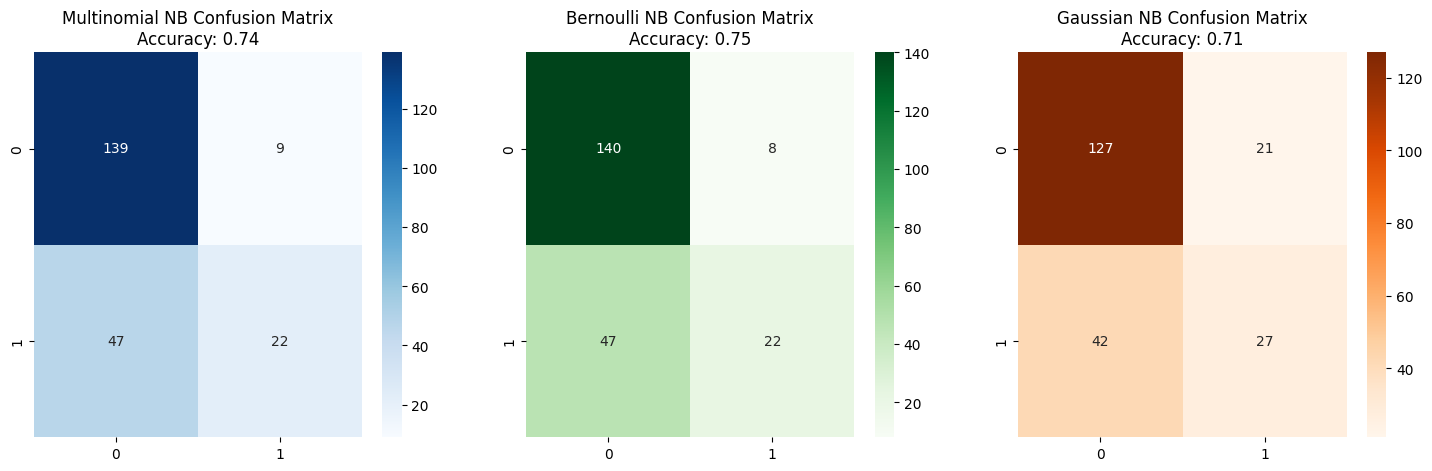

In [6]:
# Step 6: Visualizing the Results

import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes for multiple confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Confusion Matrix for Multinomial Naïve Bayes
sns.heatmap(conf_matrix_mnb, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title(f"Multinomial NB Confusion Matrix\nAccuracy: {accuracy_mnb:.2f}")

# Plot Confusion Matrix for Bernoulli Naïve Bayes
sns.heatmap(conf_matrix_bnb, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title(f"Bernoulli NB Confusion Matrix\nAccuracy: {accuracy_bnb:.2f}")

# Plot Confusion Matrix for Gaussian Naïve Bayes
sns.heatmap(conf_matrix_gnb, annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title(f"Gaussian NB Confusion Matrix\nAccuracy: {accuracy_gnb:.2f}")

# Display the visualizations
plt.show()


## For Global PCOS Demographics Dataset

In [3]:
# Step 1: Loading and Displaying the Raw Dataset (Global PCOS Demographics)

# Load the dataset
global_pcos_df = pd.read_csv("Global_PCOS_Demographics_Cleaned.csv")

# Display a sample of the raw dataset before preprocessing
print("Raw Global PCOS Demographics Dataset Sample:")
print(global_pcos_df.head())


Raw Global PCOS Demographics Dataset Sample:
      Country  Age          BMI Menstrual_Regularity Hirsutism Acne_Severity  \
0  Madagascar   26   overweight              regular       yes        severe   
1     Vietnam   16  underweight              regular       yes           NaN   
2     Somalia   41       normal              regular        no      moderate   
3      Malawi   27       normal            irregular        no          mild   
4      France   26   overweight            irregular       yes           NaN   

  Family_History_of_PCOS Insulin_Resistance  Lifestyle_Score Stress_Levels  \
0                    yes                yes                2           low   
1                     no                yes                4          high   
2                     no                 no                7        medium   
3                     no                 no               10           low   
4                     no                 no                7        medium   

  Urb

In [6]:
# Step 2: Cleaning and Preprocessing the Data (Global PCOS Demographics)

# Strip any extra spaces from column names
global_pcos_df.columns = global_pcos_df.columns.str.strip()

# Selecting relevant features and target variable for Naïve Bayes classification
selected_columns = ["Age", "BMI", "Hirsutism", "Insulin_Resistance", "Undiagnosed_PCOS_Likelihood", "Diagnosis"]
pcos_demo_df = global_pcos_df[selected_columns].copy()

# Convert categorical variables to numerical
pcos_demo_df["Hirsutism"] = pcos_demo_df["Hirsutism"].map({"yes": 1, "no": 0})
pcos_demo_df["Insulin_Resistance"] = pcos_demo_df["Insulin_Resistance"].map({"yes": 1, "no": 0})
pcos_demo_df["Diagnosis"] = pcos_demo_df["Diagnosis"].map({"yes": 1, "no": 0})

# Convert BMI categories into numerical labels
bmi_mapping = {"underweight": 0, "normal": 1, "overweight": 2, "obese": 3}
pcos_demo_df["BMI"] = pcos_demo_df["BMI"].map(bmi_mapping)

# Drop rows with missing values after transformations
pcos_demo_df.dropna(inplace=True)

# Display cleaned dataset sample
print("Cleaned and Preprocessed Global PCOS Demographics Dataset Sample:")
print(pcos_demo_df.head(25).to_string(index=False))


Cleaned and Preprocessed Global PCOS Demographics Dataset Sample:
 Age  BMI  Hirsutism  Insulin_Resistance  Undiagnosed_PCOS_Likelihood  Diagnosis
  26    2          1                   1                     0.107938          1
  16    0          1                   1                     0.156729          0
  41    1          0                   0                     0.202901          0
  27    1          0                   0                     0.073926          1
  26    2          1                   0                     0.229266          0
  17    2          0                   1                     0.209841          0
  39    3          1                   1                     0.208062          0
  38    1          1                   0                     0.205957          0
  47    1          1                   0                     0.103628          1
  21    0          0                   0                     0.102774          0
  25    1          1                   0   

In [7]:
# Step 3: Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Defining features (X) and target variable (y)
X_demo = pcos_demo_df.drop(columns=["Diagnosis"])  # Features
y_demo = pcos_demo_df["Diagnosis"]  # Target variable

# Splitting the dataset into training (80%) and testing (20%) sets
X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(X_demo, y_demo, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training Set Shape:", X_train_demo.shape, y_train_demo.shape)
print("Testing Set Shape:", X_test_demo.shape, y_test_demo.shape)

# Display a small sample of the training and testing sets
print("\nTraining Data Sample:")
print(X_train_demo.head(15))

print("\nTesting Data Sample:")
print(X_test_demo.head(15))


Training Set Shape: (96000, 5) (96000,)
Testing Set Shape: (24000, 5) (24000,)

Training Data Sample:
        Age  BMI  Hirsutism  Insulin_Resistance  Undiagnosed_PCOS_Likelihood
53541    39    3          1                   0                     0.190579
41728    32    1          0                   1                     0.062731
74819    34    1          1                   0                     0.115914
106459   16    0          0                   0                     0.158006
63062    27    2          1                   0                     0.062053
84657    23    2          1                   0                     0.206207
37747    46    2          0                   0                     0.167963
58864    25    1          0                   0                     0.117106
1364     32    2          1                   0                     0.101990
8731     29    2          1                   0                     0.235131
19586    21    3          0                   0    

In [8]:
# Step 4: Implementing Naïve Bayes Models (Multinomial, Bernoulli, and Gaussian)

from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

# Multinomial Naïve Bayes (MNB) - Used for discrete data like text classification.
mnb_demo = MultinomialNB()
mnb_demo.fit(X_train_demo, y_train_demo)
y_pred_mnb_demo = mnb_demo.predict(X_test_demo)

# Bernoulli Naïve Bayes (BNB) - Used for binary/boolean features.
bnb_demo = BernoulliNB()
bnb_demo.fit(X_train_demo, y_train_demo)
y_pred_bnb_demo = bnb_demo.predict(X_test_demo)

# Gaussian Naïve Bayes (GNB) - Used for continuous variables assuming normal distribution.
gnb_demo = GaussianNB()
gnb_demo.fit(X_train_demo, y_train_demo)
y_pred_gnb_demo = gnb_demo.predict(X_test_demo)

# Model training completed
print("Naïve Bayes models have been trained successfully on the Global PCOS Demographics dataset.")


Naïve Bayes models have been trained successfully on the Global PCOS Demographics dataset.


In [9]:
# Step 5: Evaluating the Model Performance

from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy for each model
accuracy_mnb_demo = accuracy_score(y_test_demo, y_pred_mnb_demo)
accuracy_bnb_demo = accuracy_score(y_test_demo, y_pred_bnb_demo)
accuracy_gnb_demo = accuracy_score(y_test_demo, y_pred_gnb_demo)

# Compute confusion matrices
conf_matrix_mnb_demo = confusion_matrix(y_test_demo, y_pred_mnb_demo)
conf_matrix_bnb_demo = confusion_matrix(y_test_demo, y_pred_bnb_demo)
conf_matrix_gnb_demo = confusion_matrix(y_test_demo, y_pred_gnb_demo)

# Display accuracy results
print("Model Accuracy Scores:")
print(f"Multinomial Naïve Bayes Accuracy: {accuracy_mnb_demo:.2f}")
print(f"Bernoulli Naïve Bayes Accuracy: {accuracy_bnb_demo:.2f}")
print(f"Gaussian Naïve Bayes Accuracy: {accuracy_gnb_demo:.2f}")

# Display confusion matrices
print("\nConfusion Matrix - Multinomial NB:")
print(conf_matrix_mnb_demo)

print("\nConfusion Matrix - Bernoulli NB:")
print(conf_matrix_bnb_demo)

print("\nConfusion Matrix - Gaussian NB:")
print(conf_matrix_gnb_demo)


Model Accuracy Scores:
Multinomial Naïve Bayes Accuracy: 0.89
Bernoulli Naïve Bayes Accuracy: 0.89
Gaussian Naïve Bayes Accuracy: 0.89

Confusion Matrix - Multinomial NB:
[[21457     0]
 [ 2543     0]]

Confusion Matrix - Bernoulli NB:
[[21457     0]
 [ 2543     0]]

Confusion Matrix - Gaussian NB:
[[21457     0]
 [ 2543     0]]


In [10]:
# Step 6: Applying SMOTE to Address Class Imbalance

from imblearn.over_sampling import SMOTE

# Initialize SMOTE with random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X_demo, y_demo)

# Splitting the resampled dataset into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the new dataset distribution
print("Resampled Training Set Shape:", X_train_resampled.shape, y_train_resampled.shape)
print("Resampled Testing Set Shape:", X_test_resampled.shape, y_test_resampled.shape)

# Check class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(y_resampled.value_counts())


Resampled Training Set Shape: (171848, 5) (171848,)
Resampled Testing Set Shape: (42962, 5) (42962,)

Class Distribution After SMOTE:
Diagnosis
1    107405
0    107405
Name: count, dtype: int64


In [11]:
# Step 7: Retraining Naïve Bayes Models on Balanced Data

# Multinomial Naïve Bayes (MNB)
mnb_resampled = MultinomialNB()
mnb_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_mnb_resampled = mnb_resampled.predict(X_test_resampled)

# Bernoulli Naïve Bayes (BNB)
bnb_resampled = BernoulliNB()
bnb_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_bnb_resampled = bnb_resampled.predict(X_test_resampled)

# Gaussian Naïve Bayes (GNB)
gnb_resampled = GaussianNB()
gnb_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_gnb_resampled = gnb_resampled.predict(X_test_resampled)

# Model retraining completed
print("Naïve Bayes models have been retrained successfully on the balanced dataset.")


Naïve Bayes models have been retrained successfully on the balanced dataset.


In [12]:
# Step 8: Evaluating the Naïve Bayes Models on Balanced Data

# Calculate accuracy for each model
accuracy_mnb_resampled = accuracy_score(y_test_resampled, y_pred_mnb_resampled)
accuracy_bnb_resampled = accuracy_score(y_test_resampled, y_pred_bnb_resampled)
accuracy_gnb_resampled = accuracy_score(y_test_resampled, y_pred_gnb_resampled)

# Compute confusion matrices
conf_matrix_mnb_resampled = confusion_matrix(y_test_resampled, y_pred_mnb_resampled)
conf_matrix_bnb_resampled = confusion_matrix(y_test_resampled, y_pred_bnb_resampled)
conf_matrix_gnb_resampled = confusion_matrix(y_test_resampled, y_pred_gnb_resampled)

# Display accuracy results
print("Model Accuracy Scores After Balancing:")
print(f"Multinomial Naïve Bayes Accuracy: {accuracy_mnb_resampled:.2f}")
print(f"Bernoulli Naïve Bayes Accuracy: {accuracy_bnb_resampled:.2f}")
print(f"Gaussian Naïve Bayes Accuracy: {accuracy_gnb_resampled:.2f}")

# Display confusion matrices
print("\nConfusion Matrix - Multinomial NB After Balancing:")
print(conf_matrix_mnb_resampled)

print("\nConfusion Matrix - Bernoulli NB After Balancing:")
print(conf_matrix_bnb_resampled)

print("\nConfusion Matrix - Gaussian NB After Balancing:")
print(conf_matrix_gnb_resampled)


Model Accuracy Scores After Balancing:
Multinomial Naïve Bayes Accuracy: 0.50
Bernoulli Naïve Bayes Accuracy: 0.50
Gaussian Naïve Bayes Accuracy: 0.51

Confusion Matrix - Multinomial NB After Balancing:
[[13031  8350]
 [13214  8367]]

Confusion Matrix - Bernoulli NB After Balancing:
[[20291  1090]
 [20423  1158]]

Confusion Matrix - Gaussian NB After Balancing:
[[ 9723 11658]
 [ 9490 12091]]


In [13]:
from sklearn.model_selection import GridSearchCV

# Step 9: Hyperparameter Tuning to Improve Accuracy

# Hyperparameter grid for MultinomialNB
mnb_params = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
mnb_grid = GridSearchCV(MultinomialNB(), mnb_params, cv=5)
mnb_grid.fit(X_train_resampled, y_train_resampled)
y_pred_mnb_tuned = mnb_grid.predict(X_test_resampled)

# Hyperparameter grid for BernoulliNB
bnb_params = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0], 'binarize': [0.0, 0.5, 1.0]}
bnb_grid = GridSearchCV(BernoulliNB(), bnb_params, cv=5)
bnb_grid.fit(X_train_resampled, y_train_resampled)
y_pred_bnb_tuned = bnb_grid.predict(X_test_resampled)

# GaussianNB has no key hyperparameters like alpha or binarize, so use as is
gnb_tuned = GaussianNB()
gnb_tuned.fit(X_train_resampled, y_train_resampled)
y_pred_gnb_tuned = gnb_tuned.predict(X_test_resampled)

# Evaluate tuned models
accuracy_mnb_tuned = accuracy_score(y_test_resampled, y_pred_mnb_tuned)
accuracy_bnb_tuned = accuracy_score(y_test_resampled, y_pred_bnb_tuned)
accuracy_gnb_tuned = accuracy_score(y_test_resampled, y_pred_gnb_tuned)

# Confusion matrices
conf_matrix_mnb_tuned = confusion_matrix(y_test_resampled, y_pred_mnb_tuned)
conf_matrix_bnb_tuned = confusion_matrix(y_test_resampled, y_pred_bnb_tuned)
conf_matrix_gnb_tuned = confusion_matrix(y_test_resampled, y_pred_gnb_tuned)

# Display accuracy results
print("Tuned Model Accuracy Scores:")
print(f"Multinomial NB (Best alpha={mnb_grid.best_params_['alpha']}): {accuracy_mnb_tuned:.2f}")
print(f"Bernoulli NB (Best params={bnb_grid.best_params_}): {accuracy_bnb_tuned:.2f}")
print(f"Gaussian NB (default): {accuracy_gnb_tuned:.2f}")

# Display confusion matrices
print("\nConfusion Matrix - Tuned Multinomial NB:")
print(conf_matrix_mnb_tuned)

print("\nConfusion Matrix - Tuned Bernoulli NB:")
print(conf_matrix_bnb_tuned)

print("\nConfusion Matrix - Gaussian NB (default):")
print(conf_matrix_gnb_tuned)


Tuned Model Accuracy Scores:
Multinomial NB (Best alpha=1.0): 0.50
Bernoulli NB (Best params={'alpha': 0.1, 'binarize': 0.0}): 0.50
Gaussian NB (default): 0.51

Confusion Matrix - Tuned Multinomial NB:
[[13031  8350]
 [13214  8367]]

Confusion Matrix - Tuned Bernoulli NB:
[[20291  1090]
 [20423  1158]]

Confusion Matrix - Gaussian NB (default):
[[ 9723 11658]
 [ 9490 12091]]


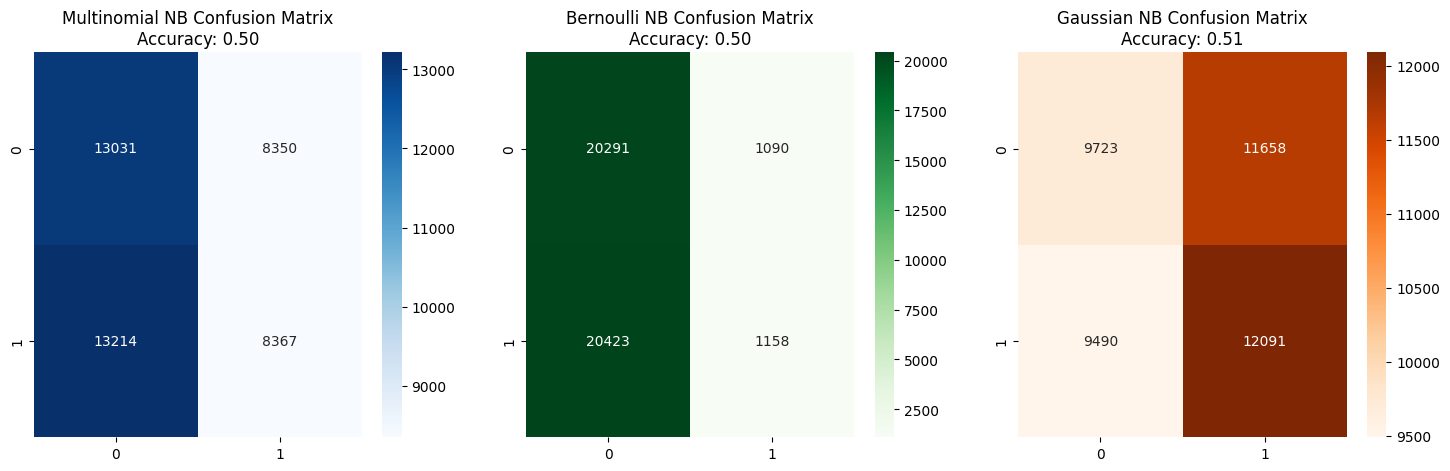

In [14]:
# Step 9: Visualizing the Results with Confusion Matrix Heatmaps

import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes for multiple confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Confusion Matrix for Multinomial Naïve Bayes
sns.heatmap(conf_matrix_mnb_resampled, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title(f"Multinomial NB Confusion Matrix\nAccuracy: {accuracy_mnb_resampled:.2f}")

# Plot Confusion Matrix for Bernoulli Naïve Bayes
sns.heatmap(conf_matrix_bnb_resampled, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title(f"Bernoulli NB Confusion Matrix\nAccuracy: {accuracy_bnb_resampled:.2f}")

# Plot Confusion Matrix for Gaussian Naïve Bayes
sns.heatmap(conf_matrix_gnb_resampled, annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title(f"Gaussian NB Confusion Matrix\nAccuracy: {accuracy_gnb_resampled:.2f}")

# Display the visualizations
plt.show()
